#NPL Real News DataSet#

Lucas Jaenisch Lopes

In [1]:
!pip install tomotopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.5 MB 363 kB/s 


#Initial Imports#

In [4]:
import sys
import spacy
import pandas as pd
import tomotopy as tp
import numpy as np
import gensim  
import re
from sklearn.feature_extraction.text import CountVectorizer
from google.colab import drive

spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


#Load Documents#

In [5]:
drive.mount('/content/drive')
fpath='/content/drive/MyDrive/'
df=pd.read_csv(fpath+'True.csv', nrows = 2000)
df.columns

Mounted at /content/drive


Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2000 non-null   object
 1   text     2000 non-null   object
 2   subject  2000 non-null   object
 3   date     2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


In [7]:
df.drop('subject', inplace=True, axis=1)
df.drop('date', inplace=True, axis=1)
df.drop('title', inplace=True, axis=1)

#NLP#

In [8]:
def get_average_feature_length(docs, feature):
  total_size = 0
  max_size = 0
  min_size = 999

  # print(docs)
  # print(feature)

  for i in docs:
    length = len(i)
    total_size += length
  
    if length > max_size:
      max_size = length

    if length < min_size:
      min_size = length

  print(f"\n{'-'*15} {feature} {'-'*15}")
  print(f"Average length: {int(total_size / len(docs))}")
  print(f"Max length: {max_size}")
  print(f"Min length: {min_size}")
  print(f"Total length (not unique): {total_size}")
  return int(total_size / len(docs))

avg_text_size = get_average_feature_length(df['text'], 'text')


--------------- text ---------------
Average length: 2405
Max length: 8504
Min length: 168
Total length (not unique): 4810840


#HTML to plain text#


In [9]:
from bs4 import BeautifulSoup as soup

clean_text = []
r = len(df)

for f in df.columns:
  if f == 'text':
    for i in df[f][:r]:
      clean_text.append((soup(i, "lxml").text, len(i)))

In [10]:
# remove objects where body length is greater than the avg body length

new_text = []

for i in range(r):
  if not clean_text[i][1] > avg_text_size:
    new_text.append(clean_text[i][0])

In [11]:
df.head()

text
0  WASHINGTON (Reuters) - The head of a conservat...
1  WASHINGTON (Reuters) - Transgender people will...
2  WASHINGTON (Reuters) - The special counsel inv...
3  WASHINGTON (Reuters) - Trump campaign adviser ...
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [12]:
# Rejoin all remaining rows to the DataFrame
clean_df = pd.DataFrame()
clean_df['text'] = new_text

df = clean_df

#Stop Words#

In [13]:
import spacy

spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [14]:
def convert_to_string(df, feature) -> str:
  output = []
  for i in range(len(df[feature])):
    output.append(df[feature][i].strip())
  return output

texts = convert_to_string(df, 'text')

dlemma = []
for i in texts:
  tdoc=nlp(i.lower())
  lm=" ".join([token.lemma_ for token in tdoc  if not(token.pos_ == 'NUM' or token.is_stop == True or token.is_digit == True or token.is_punct == True or token.lemma == False)])
  dlemma.append(lm)

for d1, d2 in zip(texts, dlemma):
  print(d1, '\n=>', d2)
  print()


The following statements were posted to the verified Twitter accounts of U.S. President Donald Trump, @realDonaldTrump and @POTUS.  The opinions expressed are his own. Reuters has not edited the statements or confirmed their accuracy.  @realDonaldTrump : - While the Fake News loves to talk about my so-called low approval rating, @foxandfriends just showed that my rating on Dec. 28, 2017, was approximately the same as President Obama on Dec. 28, 2009, which was 47%...and this despite massive negative Trump coverage & Russia hoax! [0746 EST] - Why is the United States Post Office, which is losing many billions of dollars a year, while charging Amazon and others so little to deliver their packages, making Amazon richer and the Post Office dumber and poorer? Should be charging MUCH MORE! [0804 EST] -- Source link: (bit.ly/2jBh4LU) (bit.ly/2jpEXYR) 
=> following statement   post verify twitter account u.s president donald trump @realdonaldtrump @potus   opinion express   reuters edit statem

#Bigrams#

In [15]:
from gensim.models.phrases import Phrases, Phraser

import gensim.utils

In [16]:
dtoken  = [gensim.utils.simple_preprocess(d, deacc= True, min_len=3) for d in dlemma]
phrases = Phrases(dtoken, min_count=6, threshold=15)
bigram  = Phraser(phrases)
bdocs   = [bigram[d] for d in dtoken]

[print(i) for i in bdocs]

['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'fake_news', 'love', 'talk', 'call', 'low', 'approval', 'rating', 'foxandfriends', 'show', 'rating', 'dec', 'approximately', 'president', 'obama', 'dec', 'despite', 'massive', 'negative', 'trump', 'coverage', 'russia', 'hoax', 'est', 'united_states', 'post', 'office', 'lose', 'billion_dollar', 'year', 'charge', 'amazon', 'little', 'deliver', 'package', 'make', 'amazon', 'rich', 'post', 'office', 'dumber', 'poor', 'charge', 'est_source', 'link_bit', 'jbh_bit', 'jpexyr']
['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'make', 'america_great', 'bit', 'lnpkaq', 'est', 'east', 'cold', 'new', 'year', 'eve', 'record', 'use', 'little', 'bit', 'good', 'old'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [17]:
bigrams = []

for i in bdocs:
  for j in i:
    bigrams.append(j)
    if '_' in j:
      print(j)
bigramized = bigrams

Streaming output truncated to the last 5000 lines.
president_donald
federal_reserve
source_familiar
tell_reporter
current_fed
chair_janet
yellen_term
expire_february
economic_adviser
gary_cohn
fed_governor
kevin_warsh
fed_governor
jerome_powell
stanford_university
economist_john
news_conference
prime_minister
fed_chair
kevin_warsh
fed_governor
financial_crisis
washington_reuters
president_donald
block_grant
block_grant
tell_reporter
washington_reuters
republican_senator
rand_paul
budget_resolution
tax_cut
white_house
pave_way
tax_cut
washington_reuters
president_donald
tell_reporter
white_house
request_comment
democratic_senator
fellow_republican
united_states
washington_reuters
budget_resolution
president_donald
sweeping_tax
reform_legislation
senator_rand
tell_reporter
senator_susan
house_representative
budget_resolution
tax_legislation
early_year
pass_legislation
cut_taxis
tell_reporter
white_house
middle_class
corporate_tax
rate_percent
washington_reuters
president_donald
congressi

In [18]:
print(bigramized)

['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'fake_news', 'love', 'talk', 'call', 'low', 'approval', 'rating', 'foxandfriends', 'show', 'rating', 'dec', 'approximately', 'president', 'obama', 'dec', 'despite', 'massive', 'negative', 'trump', 'coverage', 'russia', 'hoax', 'est', 'united_states', 'post', 'office', 'lose', 'billion_dollar', 'year', 'charge', 'amazon', 'little', 'deliver', 'package', 'make', 'amazon', 'rich', 'post', 'office', 'dumber', 'poor', 'charge', 'est_source', 'link_bit', 'jbh_bit', 'jpexyr', 'following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'make', 'america_great', 'bit', 'lnpkaq', 'est', 'east', 'cold', 'new', 'year', 'eve', 'record', 'use', 'little', 'bit', 'good', 'old',

#Removing Dups#

In [19]:
uniques = set(bigramized)
uniques = dict(zip(range(len(uniques)), uniques))

print("Total bigrams: ", len(bigramized))
print("Unique bigrams: ",  len(uniques))

Total bigrams:  95059
Unique bigrams:  8352


In [20]:
uniques.values()

dict_values(['leader_kim', 'appropriations', 'rock', 'cynicism', 'supreme_court', 'rico_virgin', 'remark', 'lute', 'brandon', 'jenniffer', 'redgate', 'chong', 'eleanor', 'offshore', 'independent', 'heritage', 'refundable', 'landscape', 'federal_judge', 'join', 'upset', 'abuzz', 'creativity', 'range', 'old', 'meaning', 'graves', 'commando', 'rein', 'noise', 'fbi', 'october', 'grandson', 'food', 'disgusted', 'rouhani', 'heighten', 'onslaught', 'transcribe', 'billion', 'democrats', 'deepen', 'trim', 'flunky', 'jar_kushner', 'american_free', 'eisenberg', 'ahmed', 'jane', 'notification', 'liquefy', 'riyadh', 'drug', 'dishonest', 'nude', 'sketch', 'tucson', 'defy', 'smith', 'razak', 'tech', 'entrenched', 'mike_pence', 'pardon', 'dai', 'metin', 'agn', 'nyti', 'encounter', 'fix', 'bridge', 'mandate', 'saint', 'pyongyang', 'borough', 'aggravating', 'stress', 'massachusetts', 'velazquez', 'circuit_court', 'step_aside', 'ethic', 'undecided', 'google', 'breathe', 'reinvest', 'navigation', 'victor'

#Tokenize#

In [21]:
def tokenize(dlemma):
  max_size = len(dlemma); count = 0
  output = []
  
  for i in dlemma:
    if count % 200 == 0:
      print(f"{count}/{max_size}")
    
    aux = []; doc = nlp(i)

    for token in doc:
      if token.pos_ in ['NOUN', 'PROPN']:
        aux.append(token.lemma_)
    output.append(aux)
    count += 1
  return output
        
tokens = tokenize(uniques.values())
tokens[:10]

0/8352
200/8352
400/8352
600/8352
800/8352
1000/8352
1200/8352
1400/8352
1600/8352
1800/8352
2000/8352
2200/8352
2400/8352
2600/8352
2800/8352
3000/8352
3200/8352
3400/8352
3600/8352
3800/8352
4000/8352
4200/8352
4400/8352
4600/8352
4800/8352
5000/8352
5200/8352
5400/8352
5600/8352
5800/8352
6000/8352
6200/8352
6400/8352
6600/8352
6800/8352
7000/8352
7200/8352
7400/8352
7600/8352
7800/8352
8000/8352
8200/8352


[['leader_kim'],
 ['appropriation'],
 ['rock'],
 ['cynicism'],
 ['supreme_court'],
 [],
 ['remark'],
 [],
 ['brandon'],
 []]

In [22]:
# remove empty objects from the tokens

print("Before: ", len(tokens))
clean_tokens = []
for t in tokens:
  if t != []:
    clean_tokens.append(t)
tokens = clean_tokens
print("After: ", len(tokens))

Before:  8352
After:  4706


In [23]:
# [print(d) for d in tokens]

#Metrics#

In [24]:
number_of_docs = len(tokens)
number_of_docs

4706

In [25]:
def stats_about_the_docs(docs):
  shortest_doc, largest_doc = "_"*100, ""
  max_size, min_size = 0, 999
  total_size = 0

  for i in docs:
      length = len(i[0])
      total_size += length

      if length > max_size:
        max_size = length
        largest_doc = i[0]

      if length < min_size:
        min_size = length
        shortest_doc = i[0]

  print(f"Average word length: {int(total_size / len(docs))}")
  print(f"\nMax length {max_size} : {largest_doc}")
  print(f"Min length  {min_size} : {shortest_doc}")

stats_about_the_docs(tokens)

Average word length: 7

Max length 24 : environmental_protection
Min length  3 : fbi


In [26]:
def create_single_string(tokens):
  output = ''
  for i in tokens:
    for j in i:
      output += j + " "

  return output

output = create_single_string(tokens)
output

'leader_kim appropriation rock cynicism supreme_court remark brandon chong eleanor heritage landscape creativity graves commando rein noise fbi october grandson food rouhani onslaught democrats jar_kushner american_free eisenberg jane notification riyadh drug sketch tucson smith razak tech mike_pence dai metin agn nyti bridge mandate saint pyongyang massachusetts velazquez google navigation victor overcapacity wisn goal lepage profession allianz silicon victory truck ryan_tell noah axio sept motor proposition impose_sanction reinsurance terry morning patron plead_guilty salute representative fracture mining placement course violence bystander belgian editorial custom function affair encryption bowling ifr wisconsin anger slovenian hazard schooling lone voice jong weissmann paperwork scrub msft enjoyment adherence mountaintop target emitter lnpkaq spending ethnicity opposition john_mccain nature disorder tim lithuania dugard officer devito hazleton wray stance drake heller arrangement c

#WordCloud#

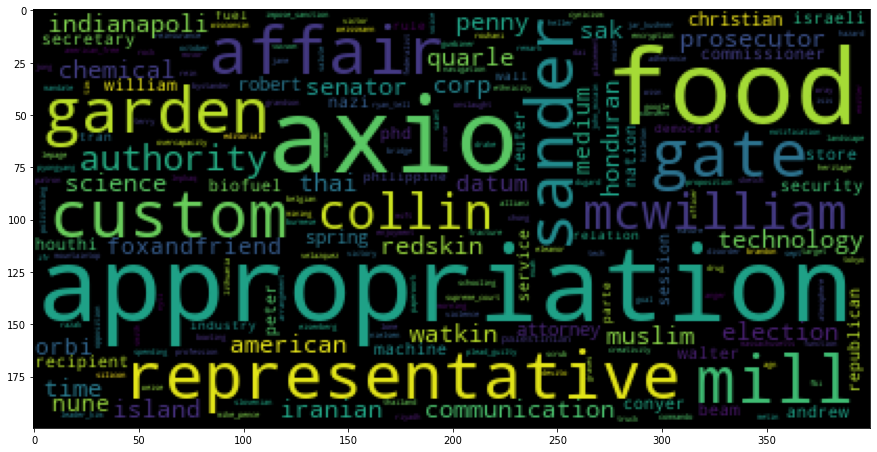

In [27]:
import wordcloud as wc
import matplotlib.pyplot as plt

mycloud = wc.WordCloud().generate(output)
plt.figure(figsize=(15,10))
plt.imshow(mycloud)

In [28]:
[print(d) for d in bdocs]

['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'fake_news', 'love', 'talk', 'call', 'low', 'approval', 'rating', 'foxandfriends', 'show', 'rating', 'dec', 'approximately', 'president', 'obama', 'dec', 'despite', 'massive', 'negative', 'trump', 'coverage', 'russia', 'hoax', 'est', 'united_states', 'post', 'office', 'lose', 'billion_dollar', 'year', 'charge', 'amazon', 'little', 'deliver', 'package', 'make', 'amazon', 'rich', 'post', 'office', 'dumber', 'poor', 'charge', 'est_source', 'link_bit', 'jbh_bit', 'jpexyr']
['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'make', 'america_great', 'bit', 'lnpkaq', 'est', 'east', 'cold', 'new', 'year', 'eve', 'record', 'use', 'little', 'bit', 'good', 'old'

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [29]:
print(bdocs)
# print(collection)

[['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'fake_news', 'love', 'talk', 'call', 'low', 'approval', 'rating', 'foxandfriends', 'show', 'rating', 'dec', 'approximately', 'president', 'obama', 'dec', 'despite', 'massive', 'negative', 'trump', 'coverage', 'russia', 'hoax', 'est', 'united_states', 'post', 'office', 'lose', 'billion_dollar', 'year', 'charge', 'amazon', 'little', 'deliver', 'package', 'make', 'amazon', 'rich', 'post', 'office', 'dumber', 'poor', 'charge', 'est_source', 'link_bit', 'jbh_bit', 'jpexyr'], ['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'make', 'america_great', 'bit', 'lnpkaq', 'est', 'east', 'cold', 'new', 'year', 'eve', 'record', 'use', 'little', 'bit', 'good', 'ol

#Dictionary#


In [30]:
from gensim.corpora import Dictionary

In [31]:
dictionary = Dictionary(bdocs)
dictionary.filter_extremes(keep_n = 10000, no_above= 0.8, no_below = 20) #==> the collection is too small for filtering it
for w in dictionary.values():
  print(dictionary.token2id[w],w) # show word id and value

0 call
1 charge
2 confirm_accuracy
3 dec
4 deliver
5 despite
6 edit_statement
7 est
8 est_source
9 express_reuters
10 fake_news
11 following_statement
12 jbh_bit
13 jpexyr
14 link_bit
15 little
16 lose
17 love
18 low
19 make
20 massive
21 obama
22 office
23 package
24 post
25 post_verify
26 potus_opinion
27 president
28 president_donald
29 realdonaldtrump
30 russia
31 show
32 talk
33 trump
34 trump_realdonaldtrump
35 twitter_account
36 united_states
37 year
38 country
39 global
40 good
41 new
42 old
43 pay
44 protect
45 record
46 use
47 alabama
48 allegation
49 challenge
50 cnn
51 conservative
52 court
53 democratic_senator
54 elect
55 election
56 face
57 file
58 john
59 late
60 moore
61 phone
62 roy_moore
63 secretary_state
64 senate
65 thursday
66 washington_reuters
67 wednesday
68 able
69 accusation
70 allege
71 ask
72 attorney_general
73 block
74 board
75 campaign
76 case
77 claim
78 complete
79 continue
80 date
81 decision
82 decline
83 democrat
84 deny
85 drop
86 early
87 governo

In [32]:
#build a bag-of-words - corpus
bagofwords = [dictionary.doc2bow(d) for d in bdocs]
[print(d) for d in bagofwords]

[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]
[(2, 1), (6, 1), (7, 1), (8, 1), (9, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (19, 1), (25, 1), (26, 1), (28, 1), (29, 1), (34, 1), (35, 1), (37, 1), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)]
[(5, 1), (16, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]
[(0, 2), (3, 1), (28, 1), (33, 2), (41, 1), (47, 4), (48, 1), (49, 4), (50, 1), (52, 1), (55, 4), (58, 1), (60, 6), (62, 1), (63, 1), (64, 1), (65, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 2

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [33]:
#just to show the matrix of bag-of-words
uniquewords=set()
for d in bdocs:
  [uniquewords.add(w) for w in d]
#create a dictionary for every doc with 0
coldict=[]
for d in bdocs:
  coldict.append(dict.fromkeys(uniquewords,0))
for i,d in enumerate(bdocs):
  for w in d:
    coldict[i][w]+=1
columns=list(uniquewords)
bagDoc=pd.DataFrame(coldict,columns=columns)
bagDoc

leader_kim  appropriations  rock  cynicism  supreme_court  rico_virgin  \
0              0               0     0         0              0            0   
1              0               0     0         0              0            0   
2              0               0     0         0              0            0   
3              0               0     0         0              0            0   
4              0               0     0         0              0            0   
...          ...             ...   ...       ...            ...          ...   
1059           0               0     0         0              0            0   
1060           0               0     0         0              0            0   
1061           0               0     0         0              0            0   
1062           0               0     0         0              0            0   
1063           0               0     0         0              0            0   

      remark  lute  brandon  jenniffer  ...  tiebreaking  cuba  physically  \
0          0     0        0          0  ...            0     0           0   
1          0     0        0          0  ...            0     0           0   
2          0     0        0          0  ...            0     0           0   
3          0     0        0          0  ...            0     0           0   
4          0     0        0          0  ...            0     0           0   
...      ...   ...      ...        ...  ...          ...   ...         ...   
1059       0     0        0          0  ...            0     0           0   
1060       0     0        0          0  ...            0     0           0   
1061       0     0        0          0  ...            0     0           0   
1062       0     0        0          0  ...            0     0           0   
1063       0     0        0          0  ...            0     0           0   

      industries  improvement  saudi_arabia  green  protection_bureau  \
0              0            0             0      0                  0   
1              0            0             0      0                  0   
2              0            0             0      0                  0   
3              0            0             0      0                  0   
4              0            0             0      0                  0   
...          ...          ...           ...    ...                ...   
1059           0            0             0      0                  0   
1060           0            0             0      0                  0   
1061           0            0             0      0                  0   
1062           0            0             0      0                  0   
1063           0            0             0      0                  0   

      appeal_court  mcleod  
0                0       0  
1                0       0  
2                0       0  
3                0       0  
4                0       0  
...            ...     ...  
1059             0       0  
1060             0       0  
1061             0       0  
1062             0       0  
1063             0       0  

[1064 rows x 8352 columns]

In [34]:
#just to show the tf-idf version
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
colAnt=[]
for d in bdocs:
  colAnt.append(' '.join(w for w in d))
X = vectorizer.fit_transform(colAnt)
features=vectorizer.get_feature_names()
dense = X.todense()
denseList=dense.tolist()
dfTfIdf = pd.DataFrame(denseList, columns=set(features))
dfTfIdf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


cynicism  appropriations  leader_kim  rock  supreme_court  rico_virgin  \
0          0.0        0.000000         0.0   0.0            0.0          0.0   
1          0.0        0.000000         0.0   0.0            0.0          0.0   
2          0.0        0.000000         0.0   0.0            0.0          0.0   
3          0.0        0.000000         0.0   0.0            0.0          0.0   
4          0.0        0.000000         0.0   0.0            0.0          0.0   
...        ...             ...         ...   ...            ...          ...   
1059       0.0        0.000000         0.0   0.0            0.0          0.0   
1060       0.0        0.000000         0.0   0.0            0.0          0.0   
1061       0.0        0.000000         0.0   0.0            0.0          0.0   
1062       0.0        0.078545         0.0   0.0            0.0          0.0   
1063       0.0        0.000000         0.0   0.0            0.0          0.0   

      remark  brandon  lute  jenniffer  ...  tiebreaking  cuba  physically  \
0        0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
1        0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
2        0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
3        0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
4        0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
...      ...      ...   ...        ...  ...          ...   ...         ...   
1059     0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
1060     0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
1061     0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
1062     0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   
1063     0.0      0.0   0.0        0.0  ...          0.0   0.0         0.0   

      industries  improvement  saudi_arabia  green  protection_bureau  \
0            0.0          0.0           0.0    0.0                0.0   
1            0.0          0.0           0.0    0.0                0.0   
2            0.0          0.0           0.0    0.0                0.0   
3            0.0          0.0           0.0    0.0                0.0   
4            0.0          0.0           0.0    0.0                0.0   
...          ...          ...           ...    ...                ...   
1059         0.0          0.0           0.0    0.0                0.0   
1060         0.0          0.0           0.0    0.0                0.0   
1061         0.0          0.0           0.0    0.0                0.0   
1062         0.0          0.0           0.0    0.0                0.0   
1063         0.0          0.0           0.0    0.0                0.0   

      appeal_court  mcleod  
0              0.0     0.0  
1              0.0     0.0  
2              0.0     0.0  
3              0.0     0.0  
4              0.0     0.0  
...            ...     ...  
1059           0.0     0.0  
1060           0.0     0.0  
1061           0.0     0.0  
1062           0.0     0.0  
1063           0.0     0.0  

[1064 rows x 8352 columns]

In [36]:
from gensim import models
from gensim.models import LdaModel
tfidf = models.TfidfModel(bagofwords)
corpus_tfidf = tfidf[bagofwords]
# myModel = LdaModel(corpus = corpus_tfidf,num_topics= 3, random_state= 27644437, id2word = dictionary, alpha = 'auto',per_word_topics = True,passes = 100)
# for t in myModel.show_topics():
#   print(t)
print('-----')
myModel = LdaModel(corpus = bagofwords,num_topics= 10, random_state= 27644437, id2word = dictionary, alpha = 'auto',per_word_topics = True,passes = 100)
for t in myModel.show_topics():
  print(t)

-----
(0, '0.024*"congress" + 0.021*"bill" + 0.020*"washington_reuters" + 0.020*"house" + 0.020*"senate" + 0.020*"republican" + 0.018*"measure" + 0.016*"funding" + 0.015*"trump" + 0.015*"legislation"')
(1, '0.086*"trump" + 0.049*"white_house" + 0.028*"president_donald" + 0.023*"washington_reuters" + 0.017*"administration" + 0.016*"official" + 0.012*"president" + 0.012*"country" + 0.012*"thursday" + 0.011*"decision"')
(2, '0.048*"trump" + 0.025*"republican" + 0.016*"state" + 0.015*"puerto_rico" + 0.014*"election" + 0.014*"president" + 0.014*"senate" + 0.012*"president_donald" + 0.011*"run" + 0.010*"tweet"')
(3, '0.018*"agency" + 0.012*"company" + 0.011*"rule" + 0.011*"trump" + 0.011*"law" + 0.010*"state" + 0.010*"group" + 0.008*"senate" + 0.008*"epa" + 0.008*"plan"')
(4, '0.025*"office" + 0.022*"statement" + 0.018*"travel" + 0.017*"resign" + 0.015*"thursday" + 0.013*"charge" + 0.012*"week" + 0.012*"representative" + 0.011*"tell" + 0.011*"report"')
(5, '0.034*"tax" + 0.030*"senate" + 0.0

#Docs Topics#

In [37]:
for i,d in enumerate(bagofwords): # collection and bagofwords must be synchronized
  print(bdocs[i],':',myModel.get_document_topics(d,minimum_probability=0.3)) #threshold


['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'fake_news', 'love', 'talk', 'call', 'low', 'approval', 'rating', 'foxandfriends', 'show', 'rating', 'dec', 'approximately', 'president', 'obama', 'dec', 'despite', 'massive', 'negative', 'trump', 'coverage', 'russia', 'hoax', 'est', 'united_states', 'post', 'office', 'lose', 'billion_dollar', 'year', 'charge', 'amazon', 'little', 'deliver', 'package', 'make', 'amazon', 'rich', 'post', 'office', 'dumber', 'poor', 'charge', 'est_source', 'link_bit', 'jbh_bit', 'jpexyr'] : [(8, 0.734156)]
['following_statement', 'post_verify', 'twitter_account', 'president_donald', 'trump_realdonaldtrump', 'potus_opinion', 'express_reuters', 'edit_statement', 'confirm_accuracy', 'realdonaldtrump', 'make', 'america_great', 'bit', 'lnpkaq', 'est', 'east', 'cold', 'new', 'year', 'eve', 'record', 'use', 'little', 'b

#Topic Metrics#

In [42]:
from gensim.models import CoherenceModel  #c_v
metrics=['u_mass', 'c_v', 'c_uci', 'c_npmi']
for metric in metrics: #,'c_w2v']:
  myModelCoher = CoherenceModel(model=myModel, texts= bdocs, dictionary=dictionary, coherence=metric)  
  print('%-7s: %2.4f'%(metric,myModelCoher.get_coherence()))

u_mass : -1.7641
c_v    : 0.4997
c_uci  : -0.6797
c_npmi : 0.0247


In [43]:
tops=[]
for k in range(10):
    t=[]
    for wt in myModel.show_topic(k):
      t.append(wt[0])
    tops.append(t)
for t in tops:
  topic_coher=CoherenceModel(topics=[t], texts= bdocs, dictionary=dictionary, coherence=metrics[1])
  print('topic:',t)
  print('C_v:%.3f'%(topic_coher.get_coherence()))
print("All:")
topic_coher=CoherenceModel(topics=tops, texts= bdocs, dictionary=dictionary, coherence=metrics[1])
print('C_v:%.3f'%(topic_coher.get_coherence()))
# top topics
print('Topics with the highest coherence score the coherence for each topic.')
myModel.top_topics(corpus=bagofwords,dictionary=dictionary,coherence=metrics[1],texts=dlemma,topn=5)

topic: ['congress', 'bill', 'washington_reuters', 'house', 'senate', 'republican', 'measure', 'funding', 'trump', 'legislation']
C_v:0.645
topic: ['trump', 'white_house', 'president_donald', 'washington_reuters', 'administration', 'official', 'president', 'country', 'thursday', 'decision']
C_v:0.417
topic: ['trump', 'republican', 'state', 'puerto_rico', 'election', 'president', 'senate', 'president_donald', 'run', 'tweet']
C_v:0.373
topic: ['agency', 'company', 'rule', 'trump', 'law', 'state', 'group', 'senate', 'epa', 'plan']
C_v:0.404
topic: ['office', 'statement', 'travel', 'resign', 'thursday', 'charge', 'week', 'representative', 'tell', 'report']
C_v:0.374
topic: ['tax', 'senate', 'washington_reuters', 'republican', 'vote', 'bill', 'plan', 'republicans', 'house', 'tax_reform']
C_v:0.647
topic: ['trump', 'north_korea', 'china', 'united_states', 'president_donald', 'president', 'deal', 'tillerson', 'talk', 'iran']
C_v:0.555
topic: ['government', 'official', 'people', 'include', 'reu

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:193: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:194: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:189: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


[([(0.024341302, 'congress'),
   (0.02131851, 'bill'),
   (0.020198058, 'washington_reuters'),
   (0.020035828, 'house'),
   (0.019991664, 'senate')],
  nan),
 ([(0.08614135, 'trump'),
   (0.04863691, 'white_house'),
   (0.027990922, 'president_donald'),
   (0.022892868, 'washington_reuters'),
   (0.017439684, 'administration')],
  nan),
 ([(0.047714885, 'trump'),
   (0.025386633, 'republican'),
   (0.016284052, 'state'),
   (0.015346353, 'puerto_rico'),
   (0.014138133, 'election')],
  nan),
 ([(0.017611735, 'agency'),
   (0.011631373, 'company'),
   (0.010882487, 'rule'),
   (0.010665431, 'trump'),
   (0.010630647, 'law')],
  nan),
 ([(0.02535596, 'office'),
   (0.021969186, 'statement'),
   (0.01833872, 'travel'),
   (0.017023843, 'resign'),
   (0.015085368, 'thursday')],
  nan),
 ([(0.034208767, 'tax'),
   (0.029846953, 'senate'),
   (0.026968377, 'washington_reuters'),
   (0.026207242, 'republican'),
   (0.02567534, 'vote')],
  nan),
 ([(0.056329004, 'trump'),
   (0.025516553, 'no

#Topics Similarity#

In [44]:
#Build a dictionary mapping words to ids
#topics_list: list of topics with probabilites
#dart is the resulting dictionary
def getTopicsDict(topics_list,dart):
	sjm=set()
	[[sjm.add(w[0]) for w in t] for t in topics_list]
	nextid=len(dart)
	for k in sjm:
		try:
			dart[k]
		except:
			dart[k]=nextid
			nextid+=1
##
## based on the dictionary (topic_dict) create a new topic list with id
def getTopicsBow(topics_list,topic_dict):
	top_bow=[]
	for l in topics_list:
		ltup=[]
		for t in l:
			ltup.append((topic_dict[t[0]],t[1]))
		top_bow.append(ltup)
	return top_bow
#
def getSimTopics(topic,top_list_bow, dist):
	simTop={}
	for i,t in enumerate(top_list_bow):
		if dist==1:
			simTop[i]=hellinger(t,topic)
		if dist==2:
			simTop[i]=jaccard(topic,t) # returns an error :( - to check
	#sort dict
	ssimTop={k: v for k, v in sorted(simTop.items(), key=lambda item: item[1])}
	return ssimTop